<a href="https://colab.research.google.com/github/uzorov/Algorithm-Templates/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C_2_%D0%A3%D0%B7%D0%BE%D1%80%D0%BE%D0%B2_%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Блок 2 – «Продвинутый». Базовые модели машинного обучения для анализа данных**

## **Модели машинного обучения. Задание 1: Логистическая регрессия**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.decomposition import PCA
import pandas as pd
import time

In [ ]:

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def train_model_and_evaluate(X_train, X_test, y_train, y_test, N=None):
    if N:
        pca = PCA(n_components=N)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    training_time = end_time - start_time

    return cm, accuracy, recall, f1, training_time

N_values = [2, 5, 10, 20, 30, 40, 50, 60]

results = {'N': [], 'Accuracy': [], 'Recall': [], 'F1 Score': [], 'Training Time (s)': []}

for N in N_values:
    print(f"Processing for N={N}...")
    cm, accuracy, recall, f1, training_time = train_model_and_evaluate(X_train, X_test, y_train, y_test, N)

    results['N'].append(N)
    results['Accuracy'].append(accuracy)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Training Time (s)'].append(training_time)

df_results = pd.DataFrame(results)

print(df_results)

Processing for N=2...
Processing for N=5...
Processing for N=10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing for N=20...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing for N=30...
Processing for N=40...
Processing for N=50...
Processing for N=60...
    N  Accuracy    Recall  F1 Score  Training Time (s)
0   2  0.631481  0.634911  0.619639           0.812217
1   5  0.846296  0.840960  0.840126           1.057976
2  10  0.912963  0.910820  0.909155           1.184177
3  20  0.948148  0.950727  0.949095           1.299176
4  30  0.964815  0.963582  0.963462           1.802155
5  40  0.974074  0.974664  0.974045           0.579918
6  50  0.972222  0.972969  0.972088           0.560976
7  60  0.972222  0.972969  0.972088           0.555158


## **Модели машинного обучения. Задание 2: Кластеризация**

In [2]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import hdbscan

In [20]:
def generate_circles(n_samples=1000, noise=0.05):
    return make_circles(n_samples=n_samples, factor=0.5, noise=noise)

def generate_moons(n_samples=1000, noise=0.05):
    return make_moons(n_samples=n_samples, noise=noise)

def generate_spiral(n_points=1000, noise=0.2):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1 = -n * np.cos(n) + np.random.rand(n_points, 1) * noise
    d2 = n * np.sin(n) + np.random.rand(n_points, 1) * noise
    x = np.append(d1, d2, axis=1)
    return x, np.zeros(n_points, dtype=int)

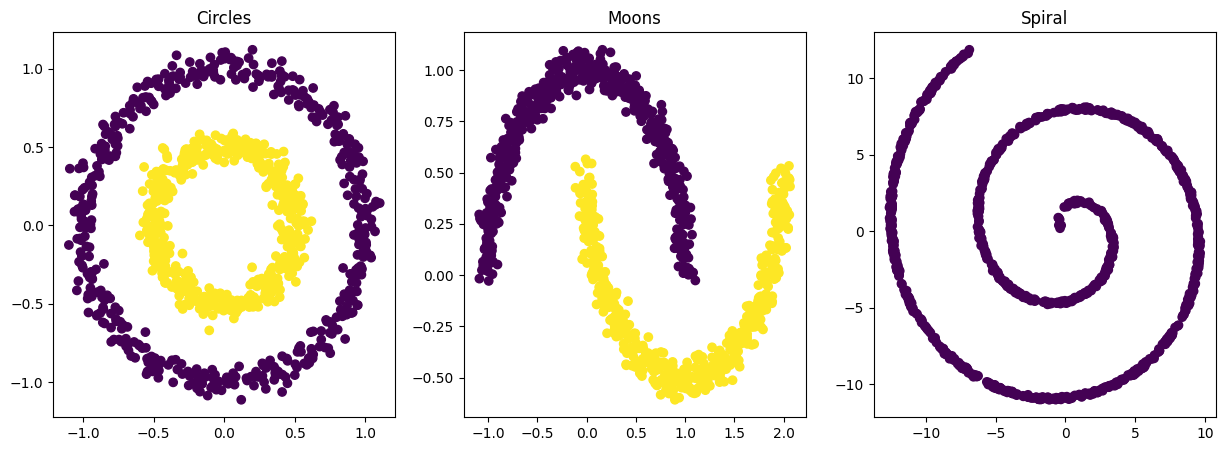

In [21]:
X_circles, y_circles = generate_circles()
X_moons, y_moons = generate_moons()
X_spiral, y_spiral = generate_spiral()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles)
ax[0].set_title("Circles")
ax[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
ax[1].set_title("Moons")
ax[2].scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral)
ax[2].set_title("Spiral")
plt.show()

In [30]:
# Функция для оценки кластеризации
def evaluate_clustering(X, labels, true_labels):
    return adjusted_rand_score(true_labels, labels)

# K-Means
def kmeans_clustering(X, n_clusters=2):
    model = KMeans(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    return labels

# DBSCAN
def dbscan_clustering(X, eps=0.2, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X)
    return labels

# Gaussian Mixtures
def gmm_clustering(X, n_components=2):
    model = GaussianMixture(n_components=n_components)
    labels = model.fit_predict(X)
    return labels


Dataset 1:
K-Means Rand Index: -0.0007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


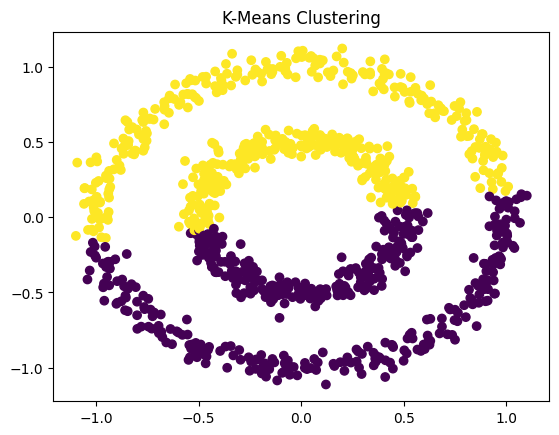

DBSCAN Rand Index: 1.0000


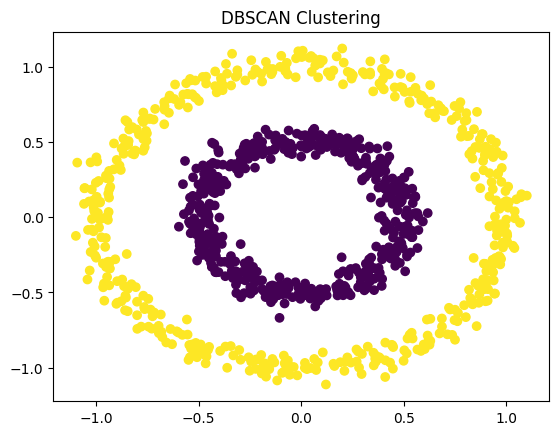

Gaussian Mixtures Rand Index: -0.0008


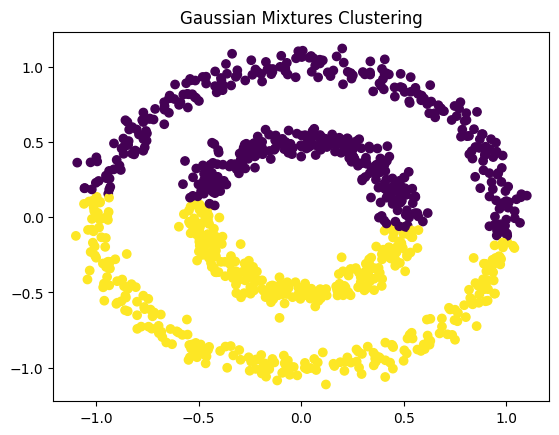


Dataset 2:
K-Means Rand Index: 0.2413


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


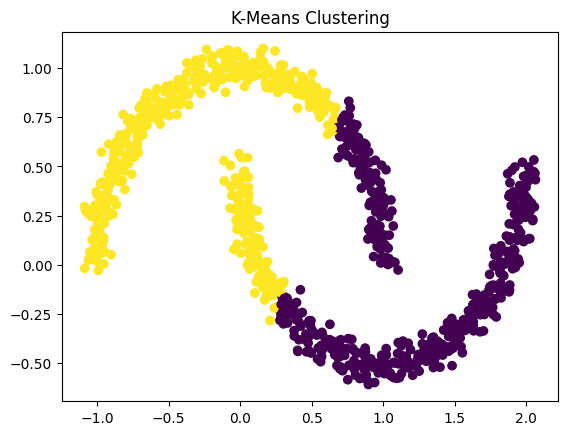

DBSCAN Rand Index: 1.0000


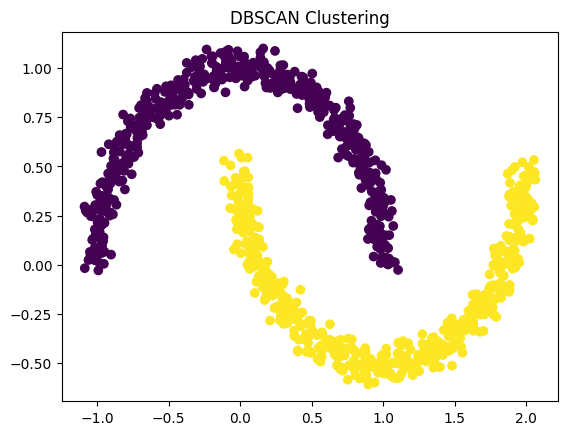

Gaussian Mixtures Rand Index: 0.5008


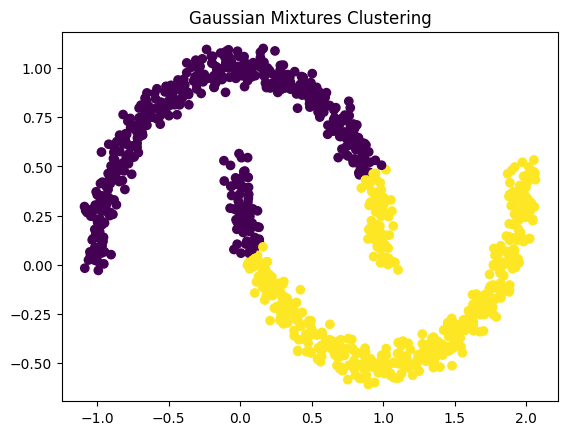


Dataset 3:
K-Means Rand Index: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


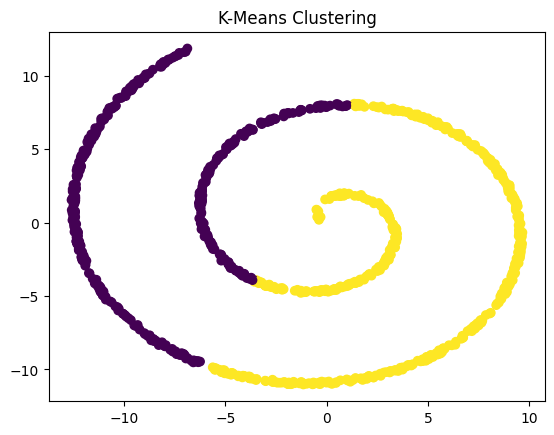

DBSCAN Rand Index: 0.0000


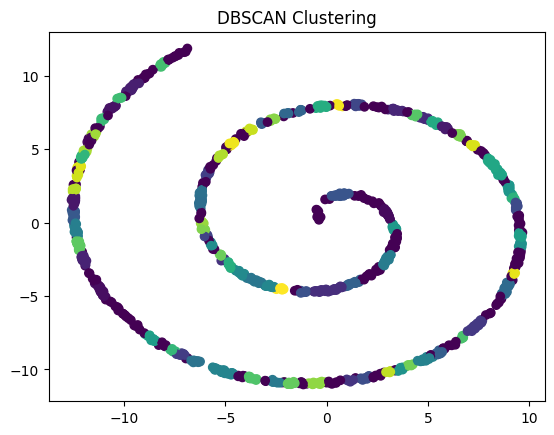

Gaussian Mixtures Rand Index: 0.0000


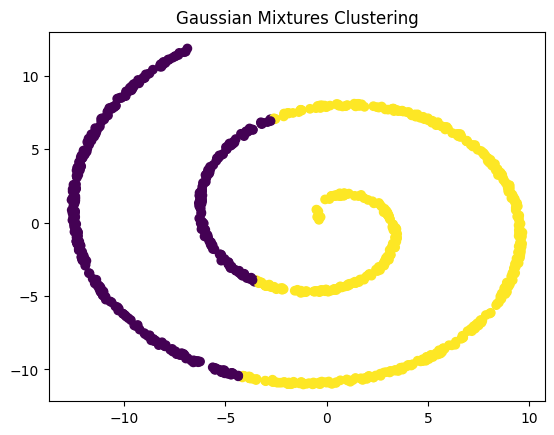

In [31]:
datasets = [(X_circles, y_circles), (X_moons, y_moons), (X_spiral, y_spiral)]
clustering_methods = [("K-Means", kmeans_clustering), ("DBSCAN", dbscan_clustering), ("Gaussian Mixtures", gmm_clustering)]

for i, (X, y_true) in enumerate(datasets):
    print(f"\nDataset {i+1}:")
    for method_name, method in clustering_methods:
        labels = method(X)
        rand_index = evaluate_clustering(X, labels, y_true)
        print(f"{method_name} Rand Index: {rand_index:.4f}")

        plt.scatter(X[:, 0], X[:, 1], c=labels)
        plt.title(f"{method_name} Clustering")
        plt.show()

## **Модели машинного обучения. Задание 3: Радиально-базисная сеть и автодифференцирование.**

In [23]:
!pip install celluloid


RBF Neurons: 5, Test Accuracy: 0.8933
RBF Neurons: 10, Test Accuracy: 0.9100
RBF Neurons: 20, Test Accuracy: 0.8833


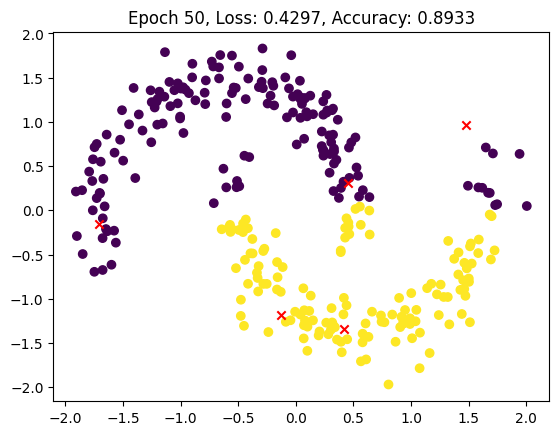

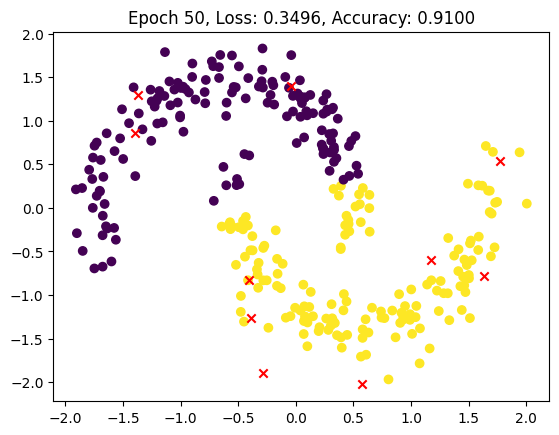

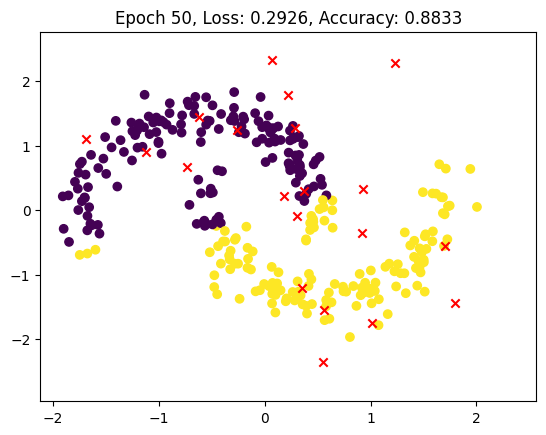

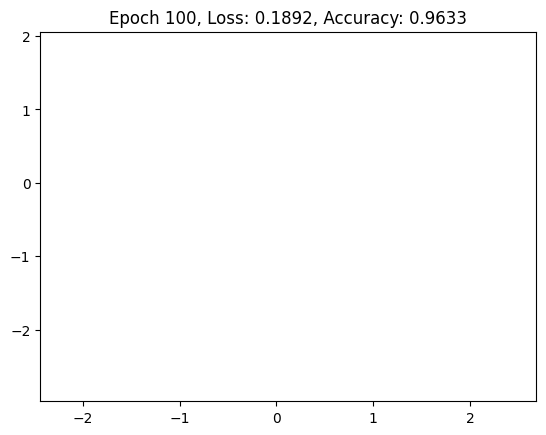

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib.animation import FuncAnimation, PillowWriter
from celluloid import Camera


X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class RBF(nn.Module):
    def __init__(self, input_dim, num_rbf, output_dim):
        super(RBF, self).__init__()
        self.num_rbf = num_rbf
        self.centers = nn.Parameter(torch.randn(num_rbf, input_dim))
        self.log_sigmas = nn.Parameter(torch.randn(num_rbf))
        self.linear = nn.Linear(num_rbf, output_dim)

    def rbf_layer(self, x):
        x = x.unsqueeze(1).expand(-1, self.num_rbf, -1)
        centers = self.centers.unsqueeze(0).expand(x.size(0), -1, -1)
        sigmas = torch.exp(self.log_sigmas).unsqueeze(0).unsqueeze(2)
        return torch.exp(-((x - centers) ** 2).sum(2) / (2 * sigmas ** 2).squeeze(2))

    def forward(self, x):
        rbf_out = self.rbf_layer(x)
        return self.linear(rbf_out)

def train_rbf_network(X_train, y_train, X_test, y_test, hidden_dim=10, epochs=100, lr=0.01):
    input_dim = X_train.shape[1]
    output_dim = len(np.unique(y_train))
    model = RBF(input_dim, hidden_dim, output_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_torch = torch.from_numpy(X_train).float()
    y_train_torch = torch.from_numpy(y_train).long()
    X_test_torch = torch.from_numpy(X_test).float()
    y_test_torch = torch.from_numpy(y_test).long()

    fig, ax = plt.subplots()
    camera = Camera(fig)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_torch)
        loss = criterion(outputs, y_train_torch)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            outputs = model(X_test_torch)
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == y_test_torch).sum().item() / y_test_torch.size(0)

        ax.scatter(X_test[:, 0], X_test[:, 1], c=predicted, cmap='viridis', marker='o')
        ax.scatter(model.centers[:, 0].detach().numpy(), model.centers[:, 1].detach().numpy(), c='red', marker='x')
        ax.set_title(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")
        camera.snap()

    animation = camera.animate(interval=200)
    animation.save('rbf_training_animation.gif', writer=PillowWriter(fps=5))
    return model, animation

# 5. Исследование влияния числа RBF-нейронов
hidden_dims = [5, 10, 20]
best_model = None
best_accuracy = 0

for hidden_dim in hidden_dims:
    model, _ = train_rbf_network(X_train, y_train, X_test, y_test, hidden_dim=hidden_dim, epochs=50)
    model.eval()
    with torch.no_grad():
        outputs = model(torch.from_numpy(X_test).float())
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == torch.from_numpy(y_test).long()).sum().item() / y_test.size
        print(f"RBF Neurons: {hidden_dim}, Test Accuracy: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

# 6. Создание и сохранение анимации для лучших гиперпараметров
best_model, best_animation = train_rbf_network(X_train, y_train, X_test, y_test, hidden_dim=10, epochs=100)
best_animation.save('best_rbf_training_animation.gif', writer=PillowWriter(fps=5))
